In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math

[249.7156535524421, 251.0457543365566, 252.3250295859947, 252.70505814435984, 253.3326293264331, 253.2371049025879, 251.95030982697062, 252.6476100594814, 251.28688683736522, 250.26304012485292, 249.49873262937757, 249.05852958651795, 247.9527088055797, 247.02686251616507, 246.15995741409878, 245.71814696803213, 244.66302223346062, 244.6142668714038, 244.62082325209823, 244.11961417108185] [0.7025992434006432, 0.7010071467569094, 0.6151302720062786, 0.5940949850027365, 0.5291192679883465, 0.5266023760284044, 0.533449387994822, 0.49045941578895574, 0.46088969641337524, 0.4868463334817763, 0.466624682148813, 0.4556710836648642, 0.4554762432968978, 0.46828300835281683, 0.4813221329900675, 0.45698935945836805, 0.47339677888334225, 0.4633617760585069, 0.46355299006056316, 0.47427079844816616]


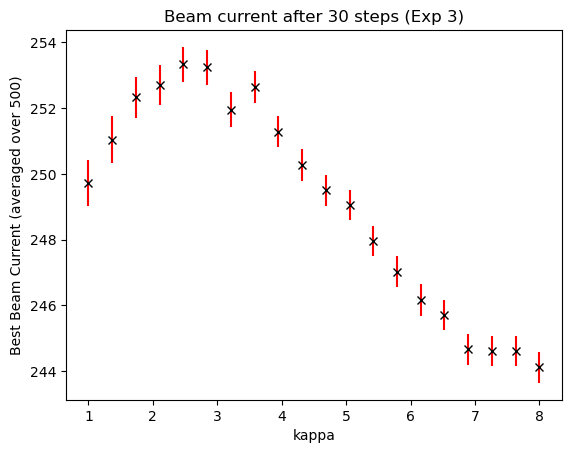

In [15]:
exp_num = '3'
n = 500
n_iter = 30
fn = "kappa_exp%s_n%d_datanorm"%(exp_num, n)
with open('../Results/%s.pickle'%fn, 'rb') as file:
    results_dict = pickle.load(file)
    
kappas = results_dict.keys()
mean = []
std = []
for kappa in kappas:
    best_list = results_dict[kappa]
    mean.append(np.mean(best_list))
    std.append(np.std(best_list))
err = [e/math.sqrt(n) for e in std]
print(mean, err)
plt.errorbar(kappas, mean, yerr=err, fmt="x", color='black', ecolor="red")
plt.title("Beam current after %d steps (Exp %s)"%(n_iter, exp_num))
plt.xlabel("kappa")
plt.ylabel("Best Beam Current (averaged over %d)"%n)
plt.savefig("../Graphs/BayesOpt/exp%s_n%d.png"%(exp_num, n))


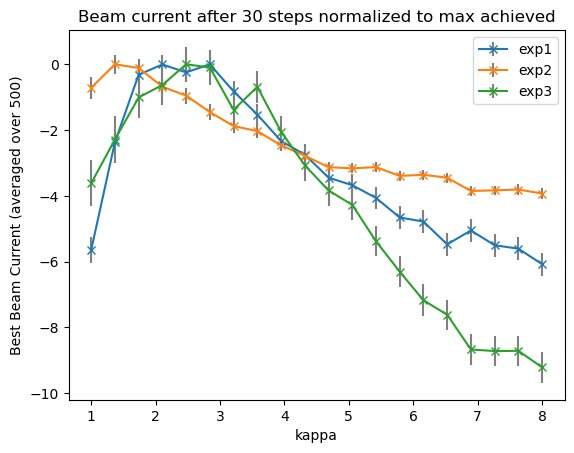

In [23]:
n = 500
n_iter = 30

for exp_num in ['1','2','3']:
    fn = "kappa_exp%s_n%d_datanorm"%(exp_num, n)
    with open('../Results/%s.pickle'%fn, 'rb') as file:
        results_dict = pickle.load(file)
        
    kappas = results_dict.keys()
    mean = []
    std = []
    for kappa in kappas:
        best_list = results_dict[kappa]
        mean.append(np.mean(best_list))
        std.append(np.std(best_list))
    err = [e/math.sqrt(n) for e in std]
    mean = [e-max(mean) for e in mean]
    plt.errorbar(kappas, mean, yerr=err, ls='-', fmt="x", ecolor="grey", label="exp%s"%exp_num)
plt.title("Beam current after %d steps normalized to max achieved"%n_iter)
plt.xlabel("kappa")
plt.ylabel("Best Beam Current (averaged over %d)"%n)
plt.legend()
plt.savefig("../Graphs/BayesOpt/exp_all_n%d.png"%n)
plt.show()
